In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.ar_model import ar_select_order

In [29]:
wines = pd.read_csv('TotalWine.csv')
print(wines.head(10))

   Time (Quarter)  TotalWine
0               1      1.486
1               2      1.915
2               3      1.844
3               4      2.808
4               5      1.287
5               6      1.861
6               7      2.034
7               8      2.739
8               9      1.656
9              10      1.918


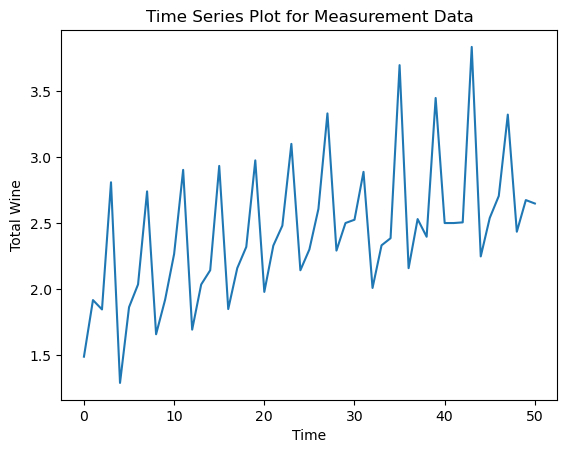

In [30]:
plt.plot(wines['TotalWine'])
plt.title('Time Series Plot for Measurement Data')
plt.xlabel('Time')
plt.ylabel('Total Wine')
plt.show()

#The Seasonal period is 4.

<Axes: >

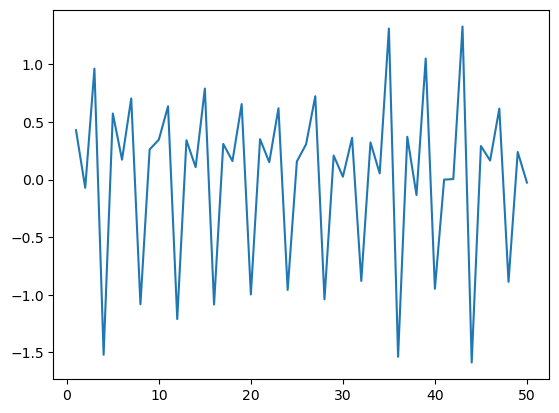

In [31]:
# LAG: 1
wines['seasonal_difference_1'] = wines['TotalWine'].diff(periods=1)
wine_seasonal_diff_1 = wines['seasonal_difference_1'].dropna()
wine_seasonal_diff_1.plot()

<Axes: >

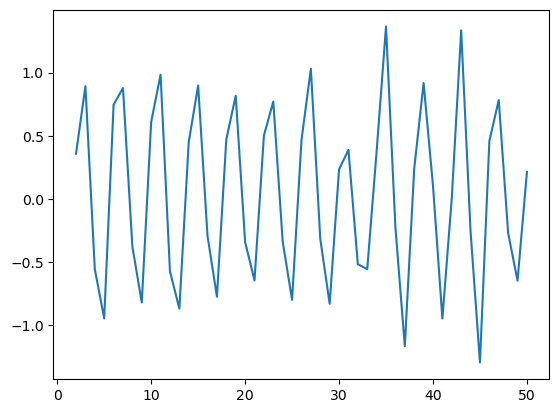

In [32]:
# LAG: 1
wines['seasonal_difference_2'] = wines['TotalWine'].diff(periods=2)
wine_seasonal_diff_2 = wines['seasonal_difference_2'].dropna()
wine_seasonal_diff_2.plot()

<Axes: >

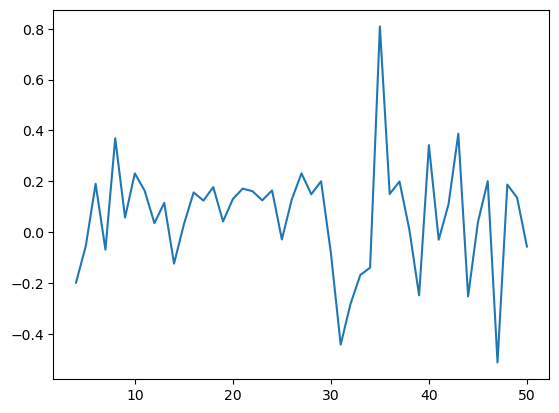

In [33]:
#LAG:4
wines['seasonal_difference_4'] = wines['TotalWine'].diff(periods=4)
wine_seasonal_diff_4 = wines['seasonal_difference_4'].dropna()
wine_seasonal_diff_4.plot()

<Axes: >

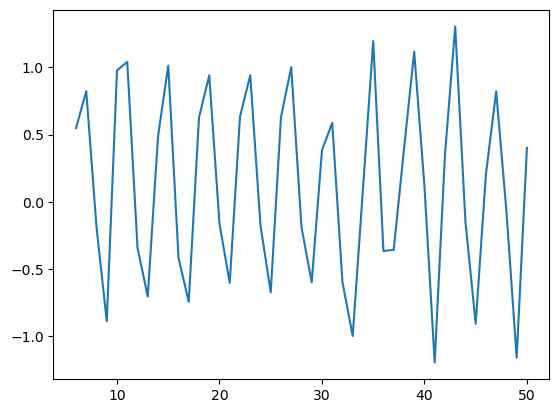

In [34]:
# LAG:6
wines['seasonal_difference_6'] = wines['TotalWine'].diff(periods=6)
wine_seasonal_diff_6 = wines['seasonal_difference_6'].dropna()
wine_seasonal_diff_6.plot()


When comparing the plots visually, after seasonal differencing at lag 4 seasonality has been removed. Therefore, LAG 4 is most suitable to remove the seasonality.

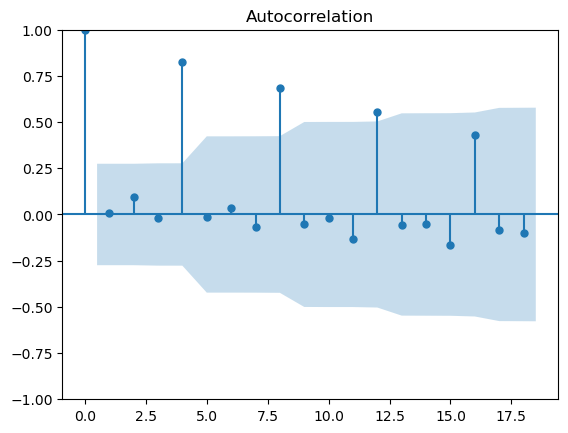

In [35]:
acf_plot = plot_acf(wines['TotalWine'])

# The seasonal period is 4 quartes or 1 Year

In [36]:
selection_results = ar_select_order(wines['TotalWine'], maxlag=4, ic='aic')

optimal_order = selection_results.ar_lags[-1]

# The optimal order based on AIC
print(f"Optimal lag order based on AIC: {optimal_order}")



Optimal lag order based on AIC: 4


In [37]:
model = ARIMA(wine_seasonal_diff_4, order=(4, 0, 0))
model_fit_ima = model.fit() 
print(model_fit_ima.summary())


                                 SARIMAX Results                                 
Dep. Variable:     seasonal_difference_4   No. Observations:                   47
Model:                    ARIMA(4, 0, 0)   Log Likelihood                  16.370
Date:                   Tue, 31 Oct 2023   AIC                            -20.739
Time:                           00:56:24   BIC                             -9.638
Sample:                                0   HQIC                           -16.562
                                    - 47                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0725      0.018      4.034      0.000       0.037       0.108
ar.L1         -0.0072      0.112     -0.064      0.949      -0.227       0.213
ar.L2          0.0470      0

/Users/neharana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/neharana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/neharana/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
predicted = model_fit_ima.predict(start=4, end=len(wine_seasonal_diff_4)-1, dynamic=False).reset_index(drop=True)
print(predicted.head(10))

0    0.252057
1    0.154932
2   -0.000086
3    0.182566
4   -0.118841
5    0.096858
6   -0.029558
7    0.013466
8    0.091069
9    0.029851
Name: predicted_mean, dtype: float64


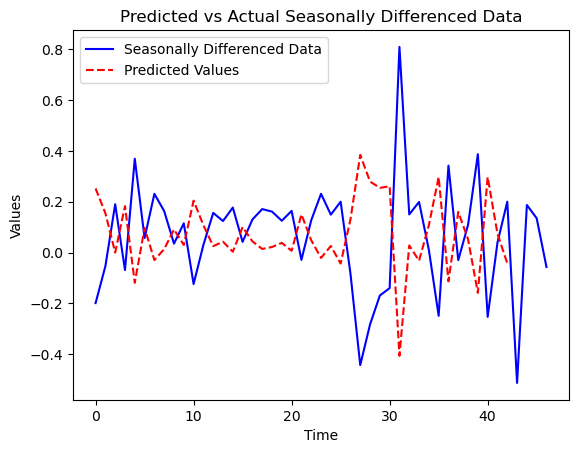

In [39]:
wine_seasonal_diff_4_indexed = wine_seasonal_diff_4.reset_index(drop=True)
plt.plot(wine_seasonal_diff_4_indexed,label="Seasonally Differenced Data", color="blue")
plt.plot(predicted, label="Predicted Values", color="red", linestyle="--")
plt.legend(loc="upper left")
plt.title("Predicted vs Actual Seasonally Differenced Data")
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


In [40]:
mae = mean_absolute_error(wine_seasonal_diff_4[optimal_order:], predicted)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 0.1325
